## Update the Docker file

Create a new file called Docker.mindboggle.new

```
FROM nipype/workshops:latest-complete
WORKDIR /home/jovyan/work
RUN conda install -y flask
RUN git clone https://github.com/nipy/mindboggle && cd mindboggle && python setup.py install
RUN git clone https://github.com/akeshavan/roygbiv && cd roygbiv && python setup.py install
RUN git clone https://github.com/akeshavan/nbpapaya && cd nbpapaya && git submodule update --init --recursive && python setup.py install
RUN mkdir /home/jovyan/data_mb && cd /home/jovyan/data_mb && curl -sSL https://osf.io/svxht/?action=download | tar xzf - -C /home/jovyan/data_mb --strip-components=2
```

### Build the docker

```
docker build -t nipypeshop_plus -f Docker.mindboggle.new .
```

### Start the docker

```
cd /path/to/workshop/
docker run -ti -v $PWD:/home/jovyan/work -p 9876:8888 -p 5000:5000 nipypeshop_plus bash
```

## Datalad

If you don't have the raw data downloaded, and want to run mindboggle, do the following:

```
cd /home/jovyan/work/data/ds000114
git remote add datasets http://datasets.datalad.org/workshops/nipype-2017/ds000114/.git
datalad get . 
```

## Try running the roygbiv webapp

```
cd ~/work
roygbiv /home/jovyan/data_mb/mindboggled/mindboggled_subjects_nipype_workshop_MIT_2017/sub-01

```

on your **chrome** browser, navigate to `localhost:5000`

## View this notebook in a browser

### Clone mindboggle directory

```
cd ~/work
git clone https://github.com/nipy/mindboggle
```

### Change directory to mindboggle/docs and start the notebook

```
cd mindboggle/docs
jupyter notebook
```


<br><br><br>

<img align="left" style="padding-right:10px; width:150px;" src="https://mfr.osf.io/export?url=https://osf.io/q7ym9/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<font size="1">
This [Mindboggle](http://mindboggle.info) tutorial is a jupyter notebook that runs in a docker container:
<br>
*
&nbsp;&nbsp;``$ docker run -it --rm -p 8888:8888 -v /Users/arno/Data/workshops:/home/jovyan/work nipype/workshops:latest-complete bash``<br>
&nbsp;&nbsp;``$ git clone https://github.com/nipy/mindboggle.git; cd mindboggle; python setup.py install; cd ..;``<br>
&nbsp;&nbsp;``$ jupyter notebook``<br>
&nbsp;&nbsp;-- <a href="http://binarybottle.com">Arno Klein</a> and Anisha Keshavan (please refer to the [Mindboggle reference](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005350#sec007))*
</font>

# Mindboggle tutorial

1. [Introduction](#introduction)
2. [Mindboggle processing steps](#processing)
3. [Run "mindboggle --help" on the command line](#help)
4. [Mindboggle on the command line](#command)
5. [Mindboggle Python library](#library)
6. Run individual functions:
   - [Example 1: Compute histogram values from a nibabel-readable image](#example1)
   - [Example 2: Compute statistical measures across vertices per label](#example2)
   - [Example 3: Decimate a left postcentral pial surface](#example3)
   - [Example 4: Relabel a VTK surface](#example4)
   - [Example 5: Segment deep vertices of surface into contiguous regions](#example5)
   - [Example 6: Extract sulcus label borders](#example6)

<a id="introduction"></a>

# Introduction
<br>
<br>
<br>
<br>

<a id="processing"></a>

# Mindboggle processing steps

<img style="padding-right:10px;" src="https://mfr.osf.io/export?url=https://osf.io/dcuh8/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">

## Output
Mindboggle takes in (FreeSurfer- and optionally ANTs-) preprocessed T1-weighted MRI data, and outputs nifti volumes, vtk surfaces, and csv tables containing label, feature, and shape information for further analysis:

- **labels/**:  *integer-labeled vtk surfaces and nifti volumes*
- **features/**:  *integer-labeled sulci or fundi on vtk surfaces*
- **shapes/**:  *float shape value for every point on vtk surfaces*
- **tables/**:  *csv tables of shape values for every label/feature/vertex*

<br>
## Processing steps

### 1. Combine FreeSurfer and ANTs gray/white segmentations:
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/k5kr8/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 2. Fill hybrid segmentation with (FreeSurfer- or ANTs-registered) labels.
### 3. Compute volume shape measures for each labeled region:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>volume and "thickinthehead" (cortical thickness)</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/n5hvx/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 4. Compute surface shape measures for every cortical mesh vertex
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>surface area</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/6varh/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>geodesic depth and travel depth</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/uv9u6/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>mean curvature</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/v7v2u/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 5. Extract cortical surface features:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>folds</b> (left and upper right, with manual labels) 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>sulci</b> (lower right)
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/jq828/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>fundi</b> (right)
<img style="padding-right:10px; width:300px;" src="https://mfr.osf.io/export?url=https://osf.io/27pjt/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 6. For each cortical surface label/sulcus, compute:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>Zernike moments</b>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>Laplace-Beltrami spectrum</b> (2nd, 3rd, and 9th spectral components shown for two brains):
<br>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/zhbvy/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">  
<br>

<br>
### 7. Compute statistics for each shape measure across vertices for each label/feature:
    - median
    - median absolute deviation
    - mean
    - standard deviation
    - skew
    - kurtosis
    - lower and upper quartiles
<br>

<a id="help"></a>

# Run "mindboggle --help" on the command line

First, let's see what command-line options Mindboggle provides:

In [18]:
! mindboggle --help

usage: mindboggle [-h] [-v] [-c INT] [--ants STR] [--out STR] [--working STR]
                  [--cache STR] [--no_volumes] [--no_surfaces] [--no_labels]
                  [--no_shapes] [--no_sulci] [--no_points] [--no_moments]
                  [--no_spectra] [--no_thickness] [--fundi] [--moments INT]
                  [--spectra INT] [--my_atlas STR] [--my_atlases  [...]]
                  [--my_graywhite STR] [--my_transform STR] [--graph STR]
                  [--roygbiv] [--plugin PLUGIN] [--plugin_args PLUGIN_ARGS]
                  DATA

The Mindboggle software automates shape analysis of anatomical labels and
features extracted from human brain MR image data (http://mindboggle.info).
Example: mindboggle $HOME/freesurfer/subjects/arno --ants
$HOME/ants/subjects/arno/antsBrainSegmentation.nii.gz

positional arguments:
  DATA                       path to directory of a person's brain data,
                             usually generated by the FreeSurfer software

optional argume

<a id="command"></a>

# Mindboggle on the command line

In the following command, computes shape measures for cortical surface labels and sulci Mindboggle takes FreeSurfer (but not ANTs) data.

mindboggle /home/jovyan/work/data/ds000114/derivatives/freesurfer/sub-01 \
 --working /home/jovyan/work/data/mindboggling 
 --out /home/jovyan/work/data/mindboggled \
 --roygbiv

<a id="library"></a>

# Mindboggle Python library

Rather than call Mindboggle from the command line, we can also call individual Python functions within the Mindboggle library, which includes the following files in mindboggle/mindboggle/:

- **mio**/  *-- input/output functions*
    - **[colors](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/colors.py)**.py  *-- colormap-related functions*
    - **[convert_volumes](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/convert_volumes.py)**.py  *-- read/write nifti volume files*
    - **[fetch_data](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/fetch_data.py)**.py  *-- fetch data from a URL or from third party software*
    - **[labels](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/labels.py)**.py  *-- information about labeling protocols*
    - **[plots](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/plots.py)**.py  *-- plot functions*
    - **[tables](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/tables.py)**.py  *-- read/write tables*
    - **[vtks](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/vtks.py)**.py  *-- read/write VTK surface files*
- **guts**/  *-- the "guts" underlying feature extraction and labeling code*
    - **[compute](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/compute.py)**.py  *-- compute distances, etc.*
    - **[graph](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/graph.py)**.py  *-- graph operations*
    - **[kernels](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/kernels.py)**.py  *-- kernels for graph operations*
    - **[mesh](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/mesh.py)**.py  *-- operate on surface mesh vertices*
    - **[paths](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/paths.py)**.py  *-- connect surface mesh vertices*
    - **[rebound](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/rebound.py)**.py  *-- adjust label borders on a surface mesh*
    - **[relabel](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/relabel.py)**.py  *-- relabel surface or volume files*
    - **[segment](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/segment.py)**.py  *-- segment a surface mesh*
- **shapes**/  *-- shape measurement functions
    - **[surface_shapes](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/surface_shapes.py)**.py  *-- compute surface shapes (calls C++ library below)*
    - **[volume_shapes](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/volume_shapes.py)**.py  *-- compute volumes and thicknesses*
    - **[laplace_beltrami](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/laplace_beltrami.py)**.py  *-- compute a Laplace-Beltrami spectrum*
    - **[zernike/zernike](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/zernike/zernike.py)**.py  *-- compute Zernike moments of a collection of vertices*
    - **[likelihood](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/likelihood.py)**.py  *-- compute (fundus) likelihood values*
- **features**/  *-- higher-level feature extraction (folds, fundi, sulci)*
    - **[folds](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/folds.py)**.py  *-- extract surface folds*
    - **[fundi](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/fundi.py)**.py  *-- extract fundus curves from folds*
    - **[sulci](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/sulci.py)**.py  *-- extract sulci from folds*

<!--
    - **thirdparty/**  *-- third-party code*
    - **[ants](https://github.com/nipy/mindboggle/blob/master/mindboggle/thirdparty/ants.py)**.py  *-- call ANTs commands*
    - **[vtkviewer](https://github.com/nipy/mindboggle/blob/master/mindboggle/thirdparty/vtkviewer.py)**.py  *-- VTK viewer (by Hal Canary)*
  - mindboggle/vtk_cpp_tools  *-- C++ tools for measuring shapes on VTK surface files*
    - **[area](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/area/PointAreaMain.cpp)**/
    - **[curvature](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/curvature/CurvatureMain.cpp)**/
    - **[geodesic_depth](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/geodesic_depth/GeodesicDepthMain.cpp)**/
    - **[travel_depth](https://github.com/nipy/mindboggle/tree/master/vtk_cpp_tools/travel_depth)**/
    - **[gradient](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/gradient/GradientMain.cpp)**/
    - **[surface_overlap](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/surface_overlap/SurfaceOverlapMain.cpp)**/
-->
<br>
<br>

<a id="functions"></a>

# Run individual functions

Let's run some functions within Mindboggle's Python library.  The following examples are adapted from the above files' docstrings.

## Example 1: Measure depth in a superior frontal gyrus
### Measure travel depth for every vertex of a brain's left hemisphere
Convert a FreeSurfer surface file to VTK format:

In [12]:
from mindboggle.mio.vtks import freesurfer_surface_to_vtk
subject_path = '/home/jovyan/work/data/ds000114/derivatives/freesurfer/sub-01/'
surface_file = freesurfer_surface_to_vtk(surface_file=subject_path + 'surf/lh.pial', 
                                         orig_file=subject_path + 'mri/orig.mgz',
                                         output_vtk='lh.pial.vtk')

Compute travel_depth for every vertex of the mesh in the VTK file:

In [13]:
import os
from mindboggle.shapes.surface_shapes import travel_depth
from mindboggle.mio.vtks import read_scalars
ccode_path = '/opt/mindboggle/vtk_cpp_tools'
command = os.path.join(ccode_path, 'travel_depth', 'TravelDepthMain')
depth_file = travel_depth(command=command,
                          surface_file=surface_file,
                          verbose=True)
depths, name = read_scalars(depth_file)

/opt/mindboggle/vtk_cpp_tools/travel_depth/TravelDepthMain lh.pial.vtk /home/jovyan/work/mindboggle/docs/lh.pial.travel_depth.vtk
170330-04:39:05,439 interface INFO:
	 stdout 2017-03-30T04:39:05.439150:Euclidean depth allocated for visible points
170330-04:39:05,440 interface INFO:
	 stdout 2017-03-30T04:39:05.439150:Geodesic propagation 1
170330-04:39:06,455 interface INFO:
	 stdout 2017-03-30T04:39:06.455203:Euclidean propagation 1
170330-04:39:06,958 interface INFO:
	 stdout 2017-03-30T04:39:06.958125:Geodesic propagation 2
170330-04:39:09,509 interface INFO:
	 stdout 2017-03-30T04:39:09.509702:Euclidean propagation 2
170330-04:39:10,13 interface INFO:
	 stdout 2017-03-30T04:39:10.013681:Geodesic propagation 3
170330-04:39:12,54 interface INFO:
	 stdout 2017-03-30T04:39:12.054087:Euclidean propagation 3
170330-04:39:12,556 interface INFO:
	 stdout 2017-03-30T04:39:12.556539:Geodesic propagation 4
170330-04:39:14,595 interface INFO:
	 stdout 2017-03-30T04:39:14.594887:Euclidean propa

Plot a histogram of the depth values:

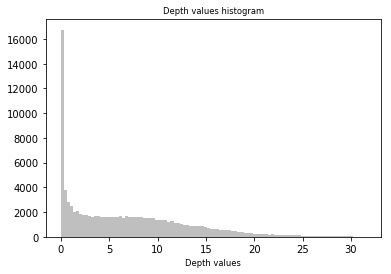

In [3]:
from mindboggle.mio.plots import histograms_of_lists
histograms_of_lists(columns=[depths],
                    column_name='Depth values',
                    ignore_columns=[],
                    nbins=100,
                    axis_limits=[],
                    titles='depth values')

Plot the depth values in 3-D:

In [15]:
from nbpapaya import Overlay
import os

In [16]:
import pandas as pd
df = pd.DataFrame(depths, columns=["depth"])
df.to_csv('depths.csv', index=False)

In [17]:
def getMeshOpts(vtk_file, csv_file, vmin, vmax, threshold):
    cols = pd.read_csv(csv_file).columns.tolist()
    MeshOpts = {}
    MeshOpts[os.path.abspath(vtk_file)] = {  
                      "filename": os.path.abspath(csv_file),
                      "colormin": "#0000FF", 
                      "colormax": "#FF0000",
                      "vmin": vmin,
                      "vmax": vmax,
                      "key": cols[0],
                      "key_options": cols,    
                      "threshold": threshold,
                      "mesh_transparency": 1,
                      "mesh_visible": True,
                      "overlay_transparency": 1
                  }
    return MeshOpts

In [7]:
MeshOpts = getMeshOpts(surface_file, "depths.csv" , 2,10,2)
Overlay(MeshOpts)

doing checks /home/jovyan/.jupyter/custom/
{'/home/jovyan/work/mindboggle/docs/lh.pial.vtk': 'papaya_data/tmpeaz3y_nr.vtk'}
/files/papaya_data/tmpeaz3y_nr.vtk
{'/home/jovyan/work/mindboggle/docs/lh.pial.vtk': {'mesh_transparency': 1, 'overlay_transparency': 1, 'threshold': 2, 'key': 'depth', 'mesh_visible': True, 'colormax': '#FF0000', 'colormin': '#0000FF', 'key_options': ['depth'], 'vmax': 10, 'filename': '/files/papaya_data/tmp2bsbwp4t.csv', 'vmin': 2}} {'/files/papaya_data/tmpeaz3y_nr.vtk': {'mesh_transparency': 1, 'overlay_transparency': 1, 'threshold': 2, 'key': 'depth', 'mesh_visible': True, 'colormax': '#FF0000', 'colormin': '#0000FF', 'key_options': ['depth'], 'vmax': 10, 'filename': '/files/papaya_data/tmp2bsbwp4t.csv', 'vmin': 2}}


### Extract folds based on depth and curvature
Plot a histogram of the depth values:

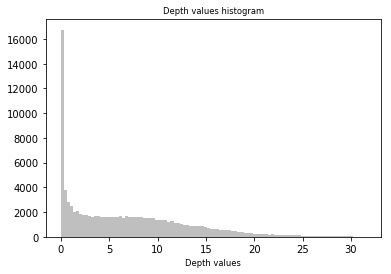

In [14]:
from mindboggle.mio.plots import histograms_of_lists
histograms_of_lists(columns=[depths],
                    column_name='Depth values',
                    ignore_columns=[],
                    nbins=100,
                    axis_limits=[],
                    titles='depth values')

Find a depth threshold to extract folds from the surface:

In [21]:
from mindboggle.features.folds import find_depth_threshold
depth_threshold, bins, bin_edges = find_depth_threshold(depth_file=depth_file,
                                                        min_vertices=10000,
                                                        verbose=True)
depth_threshold

  Depth threshold: 1.4778676864945055


1.4778676864945055

Extract folds with the depth threshold:

In [27]:
from mindboggle.features.folds import extract_folds
folds, n_folds, folds_file = extract_folds(depth_file=depth_file,
                                           depth_threshold=depth_threshold,
                                           min_fold_size=50,
                                           save_file=True,
                                           output_file='folds.vtk',
                                           background_value=-1,
                                           verbose=True)

Extract folds in surface mesh
  Segment vertices deeper than 1.48 as folds
  ...Segmented folds (2.92 seconds)
  Remove folds smaller than 50
  ...Extracted 10 folds (6.59 seconds)


Remove all vertices but the folds:

In [50]:
import numpy as np
#indices = [i for i,x in enumerate(folds) if x >-1]
#just_folds = [folds[i] for i in indices]
just_folds = np.ones(len(folds))

In [51]:
from mindboggle.mio.vtks import rewrite_scalars
rewrite_scalars(input_vtk=folds_file,
                output_vtk='rewrite_scalars.vtk',
                new_scalars=[folds],
                new_scalar_names=['folds'],
                filter_scalars=folds,
                background_value=-1)

Plot the folds in 3-D:

In [52]:
df = pd.DataFrame(just_folds, columns=["folds"])
df.to_csv('folds.csv', index=False)
MeshOpts = getMeshOpts('rewrite_scalars.vtk', "folds.csv" , 1,10,1)
Overlay(MeshOpts)

doing checks /home/jovyan/.jupyter/custom/
{'/home/jovyan/work/mindboggle/docs/rewrite_scalars.vtk': 'papaya_data/tmp27ck3nhz.vtk'}
/files/papaya_data/tmp27ck3nhz.vtk
{'/home/jovyan/work/mindboggle/docs/rewrite_scalars.vtk': {'mesh_transparency': 1, 'overlay_transparency': 1, 'threshold': 1, 'key': 'folds', 'mesh_visible': True, 'colormax': '#FF0000', 'colormin': '#0000FF', 'key_options': ['folds'], 'vmax': 10, 'filename': '/files/papaya_data/tmpgmzlmtrl.csv', 'vmin': 1}} {'/files/papaya_data/tmp27ck3nhz.vtk': {'mesh_transparency': 1, 'overlay_transparency': 1, 'threshold': 1, 'key': 'folds', 'mesh_visible': True, 'colormax': '#FF0000', 'colormin': '#0000FF', 'key_options': ['folds'], 'vmax': 10, 'filename': '/files/papaya_data/tmpgmzlmtrl.csv', 'vmin': 1}}


View histograms of statistical values:

In [ ]:
from mindboggle.mio.plots import histograms_of_lists
columns = [medians, mads, skews, kurts, lower_quarts, upper_quarts]
column_name = '.'
ignore_columns = []
nbins = 10
axis_limits = []
titles = ['medians', 'mads', 'skews', 'kurts', 'lower_quarts', 'upper_quarts']
histograms_of_lists(columns, column_name, ignore_columns, nbins, axis_limits, titles)